In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Data Analysis on Classification Problem

In [2]:
df = pd.read_csv("train_ctrUa4K.csv")
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

# Simple look at the data

In [6]:
df.describe()
#describe() function would provide count,mean,standard deviation(std),min,quartiles and max in its output for numerical variables in dataset.

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [4]:
df.info()
# here we can see that most of the columns present here are categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [18]:
print(df["Credit_History"].value_counts())
print("Total NaN values present in credit history: ",df["Credit_History"].isnull().sum())

1.0    475
0.0     89
Name: Credit_History, dtype: int64
Total NaN values present in credit history:  50


In [19]:
# from the above observations we can see that the column credit history has only null values or 0's and 1's, hence it is a categorical column and not a continuous one
# converting it to object type column

df["Credit_History"] = df["Credit_History"].astype('O')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F439EB53C8>,
      dtype=object)

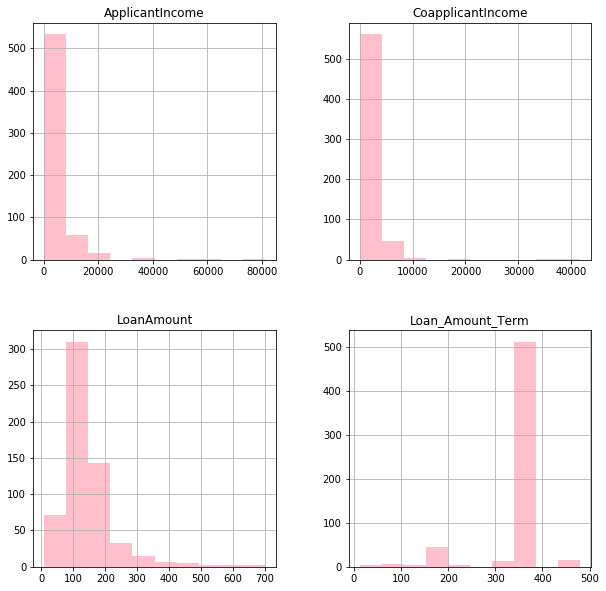

In [21]:
df.hist(figsize=(10,10),color="pink")

In [28]:
# describing the data with objects
df.describe(include="O")

Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001014   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   

        Credit_History Property_Area Loan_Status  
count            564.0           614         614  
unique             2.0             3           2  
top                1.0     Semiurban           Y  
freq             475.0           233         422

In [29]:
# In the above block of code we can see that Loan ID is unique for each and every row and hence does not contribute anything in the
# classification problem, therefore we no longer need it to be used in training the model
df.drop(columns=['Loan_ID'],inplace=True)

In [30]:
df.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term Credit_History  \
0                0.0         NaN             360.0              1   
1             1508.0       128.0             360.0              1   
2                0.0        66.0             360.0              1   
3             2358.0       120.0             360.0              1   
4                0.0       141.0             360.0              1   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

**NOTE:** Always remember that we have to check the relationship between the column to be predicted and all the other columns and check which one has
the most effect and the least effect(or say) in the final classification

In [31]:
# check if we have any duplicate rows in the datast and if we do remove it
df.duplicated().any()

False

## Column wise analysis of the dataset

In [36]:
# Analysing the final column, that we have to predict for the testing values
print(df["Loan_Status"].unique())
print(df["Loan_Status"].value_counts())
print(df["Loan_Status"].isnull().sum())

['Y' 'N']
Y    422
N    192
Name: Loan_Status, dtype: int64
0


In [38]:
# Gender column
print(df["Gender"].value_counts())
print(df["Gender"].isnull().sum())
# in the output we can see that their are 13 NaN values present in the dataset

Male      489
Female    112
Name: Gender, dtype: int64
13


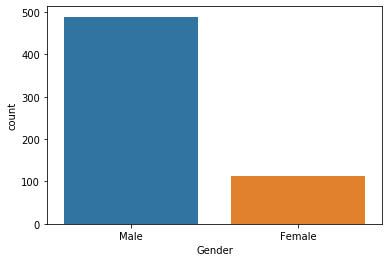

In [40]:
# it clearly states that their are more male members applying for the loans
sns.countplot(df["Gender"])

In [43]:
# hence, in this column we can see clearly that loan_status is not depending on the Gender column
pd.crosstab(df["Gender"],df["Loan_Status"])

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339

Yes    398
No     213
Name: Married, dtype: int64
3


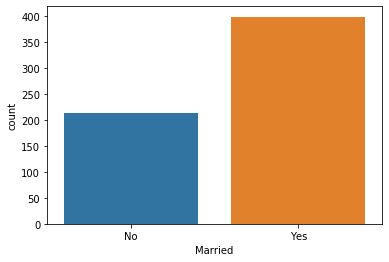

In [50]:
# Married column
print(df["Married"].value_counts())
print(df["Married"].isnull().sum())
sns.countplot(df["Married"])
# from the graph given below we can understand that out of those who have applied for loan are mostly married

In [67]:
# let's check the relation with Loan status column
new = df.groupby(df["Married"]).get_group("Yes")
l = len(new.groupby(df["Loan_Status"]).get_group("Y"))
print("Percentage of people that are married and get loan: ",(l/len(new)*100))
l1 = len(new.groupby(df["Loan_Status"]).get_group("N"))
print("Percentage of people that are married and dit not get a loan: ",(l1/len(new)*100))

Percentage of people that are married and get loan:  71.60804020100502
Percentage of people that are married and dit not get a loan:  28.391959798994975


In [68]:
new = df.groupby(df["Married"]).get_group("No")
l = len(new.groupby(df["Loan_Status"]).get_group("Y"))
print("Percentage of people that are not married and get loan: ",(l/len(new)*100))
l1 = len(new.groupby(df["Loan_Status"]).get_group("N"))
print("Percentage of people that are not married and dit not get a loan: ",(l1/len(new)*100))

Percentage of people that are not married and get loan:  62.91079812206573
Percentage of people that are not married and dit not get a loan:  37.08920187793427


In [64]:
# or we can simply do crosstab
pd.crosstab(df["Married"],df["Loan_Status"])

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285